In [1]:
!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 16.4MB/s]


In [1]:
path = "/content/advertising.csv"

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
  return [row[index] for row in data]

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()
  N = len(data)

  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)

  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X, y


In [27]:
X, y = prepare_data(path)
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(lst)

[624.1, 175.10000000000002, 300.5, 78.9]


In [14]:
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  # return w1, w2, w3, b
  w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
  return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
  return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

def compute_gradient_wi(xi, y, y_hat):
  return 2 * (y_hat - y) * xi

def compute_gradient_b(y, y_hat):
  return 2 * (y_hat - y)

def update_weight_wi(wi, dl_wi, lr):
  return wi - lr * dl_wi

def update_bias(b, dl_b, lr):
  return b - lr * dl_b

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
  losses = []
  w1, w2, w3, b = initialize_params()
  N = len(y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)
      loss = compute_loss(y_hat, y)

      dl_w1 = compute_gradient_wi(x1, y, y_hat)
      dl_w2 = compute_gradient_wi(x2, y, y_hat)
      dl_w3 = compute_gradient_wi(x3, y, y_hat)
      dl_b = compute_gradient_b(y, y_hat)

      w1 = update_weight_wi(w1, dl_w1, lr)
      w2 = update_weight_wi(w2, dl_w2, lr)
      w3 = update_weight_wi(w3, dl_w3, lr)
      b = update_bias(b, dl_b, lr)
      losses.append(loss)
  return w1, w2, w3, b, losses




In [15]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [17]:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [18]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [19]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [22]:
after_wi = update_weight_wi(wi=1.0, dl_wi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [25]:
after_b = update_bias(b=0.5, dl_b=-1.0, lr = 1e-5)
print(after_b)
print(after_wi)

0.50001
1.000005


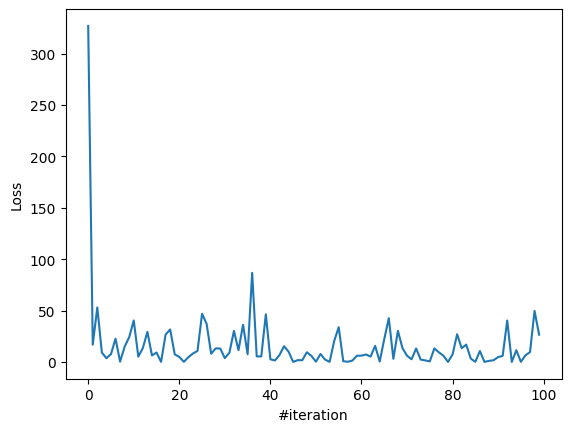

In [28]:
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [29]:
X, y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [30]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [31]:
def compute_loss_mae(y_hat, y):
  return abs(y_hat - y)

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [36]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
  losses = []
  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):
    loss_total = 0.0
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0

    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)
      loss = compute_loss(y_hat, y)

      dl_w1 = compute_gradient_wi(x1, y, y_hat)
      dl_w2 = compute_gradient_wi(x2, y, y_hat)
      dl_w3 = compute_gradient_wi(x3, y, y_hat)
      dl_b = compute_gradient_b(y, y_hat)

      dw1_total += dl_w1
      dw2_total += dl_w2
      dw3_total += dl_w3
      db_total += dl_b
      loss_total += loss

    loss_total /= N
    losses.append(loss_total)
    w1 -= lr * dw1_total / N
    w2 -= lr * dw2_total / N
    w3 -= lr * dw3_total / N
    b -= lr * db_total / N
  return w1, w2, w3, b, losses


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782949, 10.987623518830578, 10.877426442098113, 10.77030517743778, 10.666165788738784, 10.564917277518695, 10.466471490519933, 10.370743030217112, 10.277649168143096, 10.187109760945374, 10.099047169086274, 10.013386178104167, 9.930053922354574, 9.848979811153313, 9.770095457245784, 9.693334607529332, 9.618633075957472, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920476, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363875, 9.029340874825948, 8.97211310872959, 8.916357838686066, 8.86203115641928, 8.80

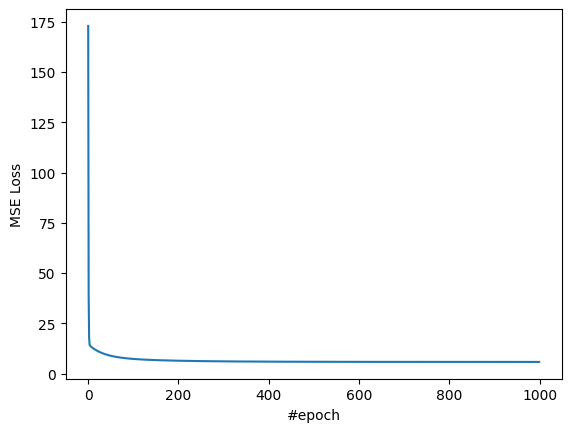

In [37]:
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [48]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()

  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)

  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return np.array(X), np.array(y)

In [39]:
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  return [0,-0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [41]:
def predict(X_features, weights):
  return np.dot(X_features, weights)

def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
  return 2 * (y_hat - y) * X_features

def update_weight(weight, dl_dweights, lr):
  return weight - lr * dl_dweights

In [49]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
  losses = []
  weights = initialize_params()
  N = len(y_output)

  for epoch in range(epoch_max):
    for i in range(N):
      features_i = X_feature[i]
      y = y_output[i]
      y_hat = predict(features_i, weights)
      loss = compute_loss(y_hat, y)
      losses.append(loss)

      dl_dweights = compute_gradient_w(features_i, y, y_hat)
      weights = update_weight(weights, dl_dweights, lr)
  return weights, losses

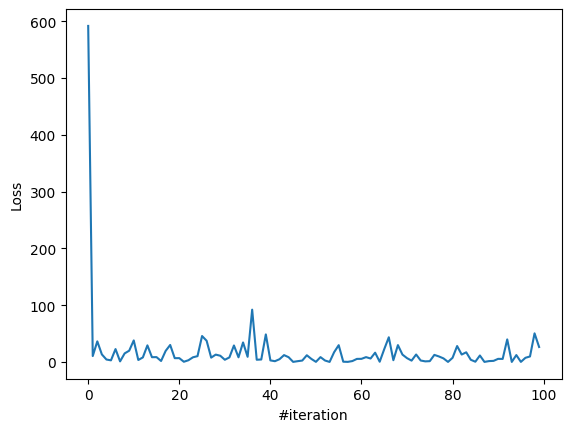

In [50]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [51]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

31.339223408109948
